# Boosting
## AdaBoost (AdaBoostClassifier / AdaBoostRegressor)
#### base_estimator: 子模型
#### n_estimators: 子模型數量
#### learning_rate: 子模型權重縮減係數
#### Boosting Tree
## Gradient Boost (GradientBoostingClassifier / GradientBoostingRegressor)
#### loss: 損失函數
#### n_estimators: 子模型數量
#### learning_rate: 子模型縮減係數

## 載入Iris資料集

In [287]:
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os,sys
sys.path.append(os.path.abspath('./')) #for import common.utility
from utility import plot_confusion_matrix,plot_decision_regions,testcase_report

## AdaBoost (Adaptive Boosting) Algorithm

In [236]:
from sklearn.ensemble import AdaBoostClassifier

In [288]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
#iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]
#只取 target 0,2
#iris_data = iris_data[iris_data['target'].isin([1,2])]
print(iris_data.shape)

target_names: ['setosa' 'versicolor' 'virginica']
(150, 5)


In [259]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [260]:
str(iris["target_names"])

"['setosa' 'versicolor' 'virginica']"

In [279]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]
#只取 target 0,2
iris_data = iris_data[iris_data['target'].isin([0,1])]
print(iris_data)

target_names: ['setosa' 'versicolor' 'virginica']
    sepal length (cm)  petal length (cm)  target
0                 5.1                1.4       0
1                 4.9                1.4       0
2                 4.7                1.3       0
3                 4.6                1.5       0
4                 5.0                1.4       0
..                ...                ...     ...
95                5.7                4.2       1
96                5.7                4.2       1
97                6.2                4.3       1
98                5.1                3.0       1
99                5.7                4.1       1

[100 rows x 3 columns]


In [286]:
iris_data=iris_data[['sepal length (cm)','petal length (cm)','target']]
iris_data=iris_data[iris_data["target"].isin([0,2])]
iris_data

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
5,5.4,1.7,0
6,4.6,1.4,0
7,5.0,1.5,0
8,4.4,1.4,0
9,4.9,1.5,0


In [242]:
iris_data["target"]

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
Name: target, dtype: int64

In [289]:
iris=datasets.load_iris()
x=pd.DataFrame(iris["data"],columns=iris["feature_names"])
print("target_names:"+str(iris["target_names"]))
y=pd.DataFrame(iris["target"],columns=["target"])
iris_data=pd.concat([x,y],axis=1)
print(iris_data.shape)

target_names:['setosa' 'versicolor' 'virginica']
(150, 5)


In [290]:
X_train, X_test, y_train, y_test = train_test_split(
     iris_data.drop(['target'],axis=1), iris_data['target'], test_size=0.3)#random_state=0

In [245]:
X_train, X_test, y_train, y_test=train_test_split(
    iris_data.drop(["target"],axis=1),iris_data["target"],test_size=0.3
) 

In [291]:
AdaBoost = AdaBoostClassifier(n_estimators=100) 
AdaBoost.fit(X_train, y_train)


AdaBoostClassifier(n_estimators=100)

In [247]:
AdaBoost=AdaBoostClassifier(n_estimators=100)
AdaBoost.fit(X_train,y_train)


AdaBoostClassifier(n_estimators=100)

In [248]:
#from sklearn.ensemble import GradientBoostingClassifier
#GradientBoostingClassifier()


In [292]:
print('training score:',AdaBoost.score(X_train,y_train))
print('test score:',AdaBoost.score(X_test,y_test))

training score: 0.9333333333333333
test score: 0.9333333333333333


In [250]:
print('training score:',AdaBoost.score(X_train,y_train))
print('test score:',AdaBoost.score(X_test,y_test))



training score: 0.9904761904761905
test score: 0.9555555555555556


In [295]:
report=testcase_report(iris_data,AdaBoost,X_train,X_train,y_train)
report

accuracy: 0.9333333333333333
error_index : [  3  20  27  69  78  96 102]
miss classification : [1 1 1 2 1 1 1]
number of errors :7/105
error data index: Int64Index([121, 123, 126, 83, 138, 127, 146], dtype='int64')


(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
 121                5.6               2.8                4.9               2.0   
 123                6.3               2.7                4.9               1.8   
 126                6.2               2.8                4.8               1.8   
 83                 6.0               2.7                5.1               1.6   
 138                6.0               3.0                4.8               1.8   
 127                6.1               3.0                4.9               1.8   
 146                6.3               2.5                5.0               1.9   
 
      target  pred  
 121       2     1  
 123       2     1  
 126       2     1  
 83        1     2  
 138       2     1  
 127       2     1  
 146       2     1  ,
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
 55                 5.7               2.8                4.5               1.3   
 149     

In [252]:
print(1-len(error_index))

-3


In [294]:
pred=AdaBoost.predict(X_test)
pred

array([1, 2, 2, 2, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 2, 0,
       0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 2, 2, 1, 1, 2, 1, 0, 2, 1, 2, 0, 0,
       1])

In [284]:
X_test

,sepal length (cm),petal length (cm)
38,4.4,1.3
19,5.1,1.5
32,5.2,1.5
45,4.8,1.4
53,5.5,4.0
59,5.2,3.9
58,6.6,4.6
97,6.2,4.3
37,4.9,1.4
64,5.6,3.6


In [255]:
target

NameError: name 'target' is not defined

In [296]:
X_test["target"]=y_test
X_test["pred"]=pred
only_mis=X_test[X_test["target"]!=X_test["pred"]]  
only_mis
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,pred
82,5.8,2.7,3.9,1.2,1,1
109,7.2,3.6,6.1,2.5,2,2
125,7.2,3.2,6.0,1.8,2,2
139,6.9,3.1,5.4,2.1,2,2
16,5.4,3.9,1.3,0.4,0,0
6,4.6,3.4,1.4,0.3,0,0
95,5.7,3.0,4.2,1.2,1,1
69,5.6,2.5,3.9,1.1,1,1
75,6.6,3.0,4.4,1.4,1,1
44,5.1,3.8,1.9,0.4,0,0


KeyError: 'pred'

In [ ]:
X_test.iloc[error_index].index

Int64Index([24, 114, 108, 85], dtype='int64')

In [ ]:
report=testcase_report(iris_data,AdaBoost,X_test,X_test,y_test)
report

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- pred
- target


In [ ]:
error_index=np.where(pred!=y_test)[0]
print(error_index)


[ 2  3 15 36]


In [ ]:
y_test

13     0
64     1
68     1
10     0
84     1
3      0
83     1
109    2
19     0
17     0
63     1
20     0
43     0
47     0
36     0
41     0
69     1
89     1
45     0
134    2
105    2
50     1
48     0
108    2
53     1
107    2
141    2
40     0
91     1
128    2
0      0
122    2
8      0
111    2
16     0
76     1
77     1
146    2
60     1
140    2
143    2
86     1
119    2
54     1
144    2
Name: target, dtype: int64

In [ ]:
pred[error_index]

array([2, 2])

In [ ]:
def testcase_report(dataset,classifier,Xtestset,X_test,ground_truth):
    Xtestset=Xtestset.copy()
    pred=classifier.predict(X_test)
    error_index=np.where(pred!=ground_truth)[0]
    print('accuracy:',1-len(error_index)/len(Xtestset))
    print('error_index :',error_index)
    print('miss classification :',pred[error_index])
    data_index=Xtestset.iloc[error_index].index
    print('number of errors :%d/%d'%(len(error_index),len(X_test)))
    print('error data index:',data_index)
    Xtestset['target']=ground_truth
    Xtestset['pred']=pred
    only_mis=Xtestset[Xtestset['pred']!=Xtestset['target']]
    return only_mis,Xtestset

In [ ]:
df

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9


In [ ]:
data={"a":[1,2,3],"b":[4,5,6],"c":[7,8,9]}
df=pd.DataFrame(data)
row1=df.iloc[1,2]
row1

8

In [ ]:
import pandas as pd

# 创建一个示例数据框
data = {'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]}
df = pd.DataFrame(data)

# 使用 iloc 选择特定行
row_1 = df.iloc[0]  # 选择第一行

# 使用 iloc 选择特定列
col_A = df.iloc[:, 0]  # 选择第一列

# 使用 iloc 选择特定行和列
element = df.iloc[1, 2]  # 选择第二行第三列的元素

# 使用 iloc 选择行范围和列范围
subset = df.iloc[0:2, 1:3]  # 选择前两行和第二、三列的子集

print(row_1)
print(col_A)
print(element)
print(subset)


A    1
B    4
C    7
Name: 0, dtype: int64
0    1
1    2
2    3
Name: A, dtype: int64
8
   B  C
0  4  7
1  5  8


In [269]:
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,pred
143,6.8,3.2,5.9,2.3,2,2
31,5.4,3.4,1.5,0.4,0,0
131,7.9,3.8,6.4,2.0,2,2
39,5.1,3.4,1.5,0.2,0,0
74,6.4,2.9,4.3,1.3,1,1
109,7.2,3.6,6.1,2.5,2,2
19,5.1,3.8,1.5,0.3,0,0
140,6.7,3.1,5.6,2.4,2,2
77,6.7,3.0,5.0,1.7,1,2
141,6.9,3.1,5.1,2.3,2,2


In [273]:
pred=AdaBoost.predict(X_test)
pred

array([0, 0, 0, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 2, 0, 1, 1, 2, 1, 0, 0,
       2, 0, 2, 0, 2, 1, 2, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 2, 2, 0, 2,
       2])

In [ ]:
y_test.values

array([1, 2, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1, 0, 2, 1, 2, 0, 2, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 2, 0, 0, 0, 2, 1, 1, 1, 2, 0, 0, 0, 2, 2, 0, 1,
       2])

In [274]:
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
35,5.0,3.2,1.2,0.2
19,5.1,3.8,1.5,0.3
26,5.0,3.4,1.6,0.4
82,5.8,2.7,3.9,1.2
94,5.6,2.7,4.2,1.3
110,6.5,3.2,5.1,2.0
65,6.7,3.1,4.4,1.4
124,6.7,3.3,5.7,2.1
0,5.1,3.5,1.4,0.2
78,6.0,2.9,4.5,1.5


In [297]:
importances = AdaBoost.feature_importances_
print(importances)
indices = np.argsort(importances)  #np.argsort :Returns the indices that would sort an array.
print(indices)

[0.   0.   0.53 0.47]
[0 1 3 2]


In [298]:
importances=AdaBoost.feature_importances_
print(importances)
indices=np.argsort(importances)
print(indices)

[0.   0.   0.53 0.47]
[0 1 3 2]


In [276]:
features =X_train.keys()
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [ ]:
features=X_train.keys()
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

Index(['sepal length (cm)', 'sepal width (cm)', 'petal width (cm)',
       'petal length (cm)'],
      dtype='object')


Text(0.5, 0, 'aa')

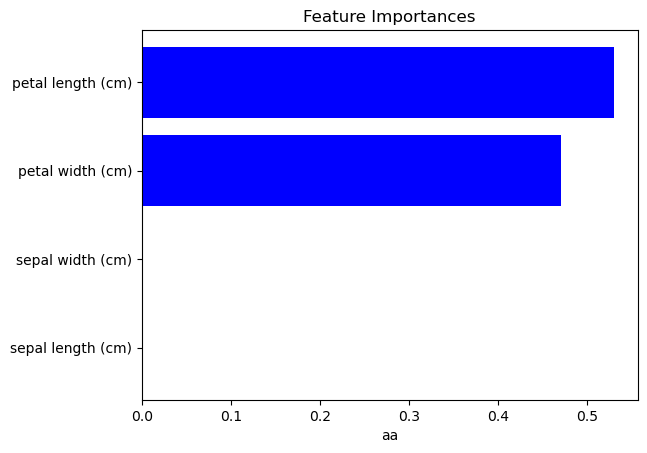

In [303]:
plt.figure(1)
print(features[indices])
plt.title("Feature Importances")
plt.barh(range(len(indices)),importances[indices],color="b",align="center")
plt.yticks(range(len(indices)),features[indices])
plt.xlabel("aa")


Index(['sepal length (cm)', 'sepal width (cm)', 'petal width (cm)',
       'petal length (cm)'],
      dtype='object')


Text(0.5, 0, 'Relative Importance')

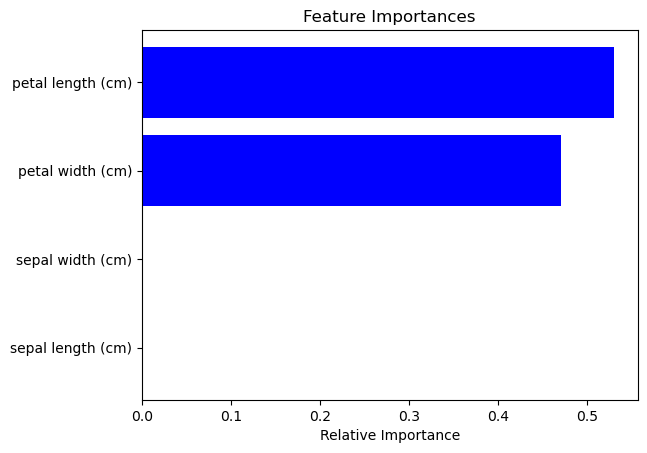

In [305]:
plt.figure(1)
print(features[indices])
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')